# Import data and libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.5)
RANDOM_SEED = 42



In [3]:
import os
import glob

import numpy as np


def get_file_names_with_strings(str_list):
    full_list = os.listdir("/content/drive/MyDrive/thigh")
    final_list = [nm for ps in str_list for nm in full_list if ps in nm]

    return final_list

KFECORRECT= get_file_names_with_strings(['KFEL0'])
string = '/content/drive/MyDrive/thigh/'
KFECORRECT = [string + x for x in KFECORRECT]

KFEWRONG= get_file_names_with_strings(['KFEL1'])
KFEWRONG = [string + x for x in KFEWRONG]

HAACORRECT= get_file_names_with_strings(['HAAL0'])
HAACORRECT = [string + x for x in HAACORRECT]

HAAWRONG= get_file_names_with_strings(['HAAL1'])
HAAWRONG = [string + x for x in HAAWRONG]



SQTCORRECT= get_file_names_with_strings(['SQT0'])
SQTCORRECT = [string + x for x in SQTCORRECT]

SQTWRONG= get_file_names_with_strings(['SQT1'])
SQTWRONG = [string + x for x in SQTWRONG]



In [4]:
SQTWRONG

['/content/drive/MyDrive/thigh/A01SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A01SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A02SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A02SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A03SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A03SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A04SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A04SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A06SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A06SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A07SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A07SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A08SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A08SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A09SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A09SQT1_1.csv',
 '/content/drive/MyDrive/thigh/A10SQT1_2.csv',
 '/content/drive/MyDrive/thigh/A10SQT1_1.csv',
 '/content/drive/MyDrive/thigh/B01SQT1_1.csv',
 '/content/drive/MyDrive/thigh/B01SQT1_2.csv',
 '/content/drive/MyDrive/thigh/B02SQT1_2.csv',
 '/content/dr

In [5]:

dfKFEWRONG = pd.concat(map(pd.read_csv, KFEWRONG), ignore_index=True)

In [6]:
dfKFECORRECT = pd.concat(map(pd.read_csv, KFECORRECT), ignore_index=True)

In [7]:
dfHAACORRECT = pd.concat(map(pd.read_csv, HAACORRECT), ignore_index=True)

In [8]:
dfHAAWRONG = pd.concat(map(pd.read_csv, HAAWRONG), ignore_index=True)


In [9]:
dfSQTCORRECT = pd.concat(map(pd.read_csv, SQTCORRECT), ignore_index=True)

In [10]:
dfSQTWRONG = pd.concat(map(pd.read_csv, SQTWRONG), ignore_index=True)

In [11]:

dfKFECORRECT['EXERCISE'] = 'KFE0'
dfKFEWRONG['EXERCISE'] = 'KFE1'
dfHAACORRECT['EXERCISE'] = 'HAA0'
dfHAAWRONG['EXERCISE'] = 'HAA1'
dfSQTCORRECT['EXERCISE'] = 'SQT0'
dfSQTWRONG['EXERCISE'] = 'SQT1'

In [12]:
def multiplier(s):
  correct= s*1000000
  return correct

In [13]:
from sklearn.preprocessing import OneHotEncoder


In [14]:
FRAMES= [dfKFECORRECT,dfKFEWRONG, dfHAACORRECT, dfHAAWRONG,dfSQTCORRECT, dfSQTWRONG ]

In [15]:
df = pd.concat(FRAMES)

In [16]:
df

,Time (s),Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g),Magnetometer X (uT),Magnetometer Y (uT),Magnetometer Z (uT),EXERCISE
0,11.072104,3.118330,0.259187,-0.048827,0.295775,0.005091,0.867689,-18.66497,-20.88034,-22.31133,KFE0
1,11.081991,5.667225,0.082660,-0.109918,0.301046,0.001530,0.890798,-18.66497,-20.88034,-22.31133,KFE0
2,11.091876,7.283597,-0.388080,0.012264,0.298562,0.013840,0.932092,-18.65163,-20.89466,-23.08957,KFE0
3,11.101762,7.656606,-0.682293,0.012264,0.292717,0.017461,0.945533,-18.65163,-20.89466,-23.08957,KFE0
4,11.111648,7.407934,-0.564608,-0.232101,0.281141,0.026477,0.928161,-18.65163,-20.89466,-23.08957,KFE0
...,...,...,...,...,...,...,...,...,...,...,...
183600,211.400000,4.666903,2.593061,-0.047129,0.960333,-0.021166,-0.238782,-35.82767,-22.54994,20.98022,SQT1
183601,211.410000,5.289162,2.710874,-0.047129,0.964186,-0.019610,-0.230565,-35.82767,-22.54994,20.98022,SQT1
183602,211.420000,6.035874,2.651967,-0.108188,0.962758,-0.021130,-0.236845,-35.83390,-22.24681,21.03853,SQT1
183603,211.430000,7.155941,2.593061,-0.108188,0.959844,-0.021161,-0.237818,-35.83390,-22.24681,21.03853,SQT1


In [17]:
df.rename(columns = {'Time (s)':'time'}, inplace = True)
df.rename(columns = {'Gyroscope X (deg/s)':'gx'}, inplace = True)
df.rename(columns = {'Gyroscope Y (deg/s)':'gy'}, inplace = True)
df.rename(columns = {'Gyroscope Z (deg/s)':'gz'}, inplace = True)
df.rename(columns = {'Accelerometer X (g)':'ax'}, inplace = True)
df.rename(columns = {'Accelerometer Y (g)':'ay'}, inplace = True)
df.rename(columns = {'Accelerometer Z (g)':'az'}, inplace = True)
df.rename(columns = {'Magnetometer X (uT)':'mx'}, inplace = True)
df.rename(columns = {'Magnetometer Y (uT)':'my'}, inplace = True)
df.rename(columns = {'Magnetometer Z (uT)':'mz'}, inplace = True)
df.rename(columns = {'EXERCISE':'exercise'}, inplace = True)



In [18]:
df

,time,gx,gy,gz,ax,ay,az,mx,my,mz,exercise
0,11.072104,3.118330,0.259187,-0.048827,0.295775,0.005091,0.867689,-18.66497,-20.88034,-22.31133,KFE0
1,11.081991,5.667225,0.082660,-0.109918,0.301046,0.001530,0.890798,-18.66497,-20.88034,-22.31133,KFE0
2,11.091876,7.283597,-0.388080,0.012264,0.298562,0.013840,0.932092,-18.65163,-20.89466,-23.08957,KFE0
3,11.101762,7.656606,-0.682293,0.012264,0.292717,0.017461,0.945533,-18.65163,-20.89466,-23.08957,KFE0
4,11.111648,7.407934,-0.564608,-0.232101,0.281141,0.026477,0.928161,-18.65163,-20.89466,-23.08957,KFE0
...,...,...,...,...,...,...,...,...,...,...,...
183600,211.400000,4.666903,2.593061,-0.047129,0.960333,-0.021166,-0.238782,-35.82767,-22.54994,20.98022,SQT1
183601,211.410000,5.289162,2.710874,-0.047129,0.964186,-0.019610,-0.230565,-35.82767,-22.54994,20.98022,SQT1
183602,211.420000,6.035874,2.651967,-0.108188,0.962758,-0.021130,-0.236845,-35.83390,-22.24681,21.03853,SQT1
183603,211.430000,7.155941,2.593061,-0.108188,0.959844,-0.021161,-0.237818,-35.83390,-22.24681,21.03853,SQT1


In [19]:
check_nan = df[	'ax'].isnull().values.any()
 
# printing the result
print(check_nan)

False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974126 entries, 0 to 183604
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      974126 non-null  float64
 1   gx        974126 non-null  float64
 2   gy        974126 non-null  float64
 3   gz        974126 non-null  float64
 4   ax        974126 non-null  float64
 5   ay        974126 non-null  float64
 6   az        974126 non-null  float64
 7   mx        974126 non-null  float64
 8   my        974126 non-null  float64
 9   mz        974126 non-null  float64
 10  exercise  974126 non-null  object 
dtypes: float64(10), object(1)
memory usage: 89.2+ MB


In [21]:
countactivity= df['exercise'].value_counts()
countactivity

SQT1    183605
HAA0    165769
SQT0    164253
HAA1    160557
KFE0    154903
KFE1    145039
Name: exercise, dtype: int64

In [22]:
df=df.drop(['mx'], axis=1)

In [23]:
df=df.drop(['my'], axis=1)

In [24]:
df=df.drop(['mz'], axis=1)

# Plot and visualization


In [25]:
def plot_activity(activity, df):
  extractrows= (df['exercise']==activity)
  data= df[extractrows]
  data= data[['gx',	'gy',	'gz',	'ax',	'ay',	'az']]
  data=data[:1000]
  ok=data.plot(subplots=True, figsize= (16,12), title=activity)

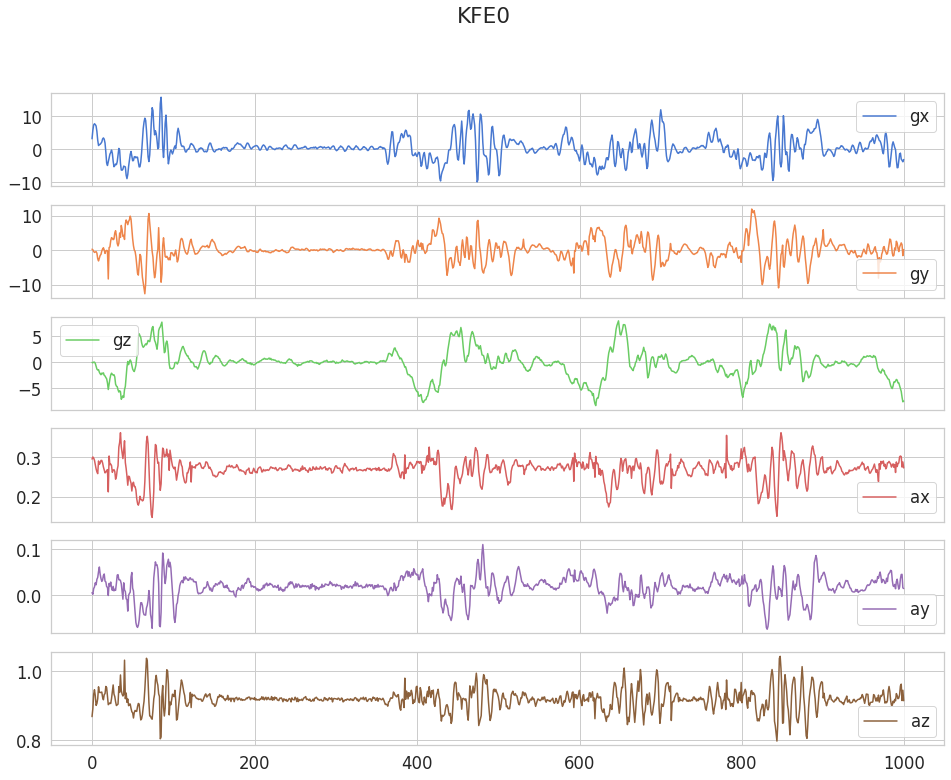

In [26]:
plot_activity("KFE0", df)

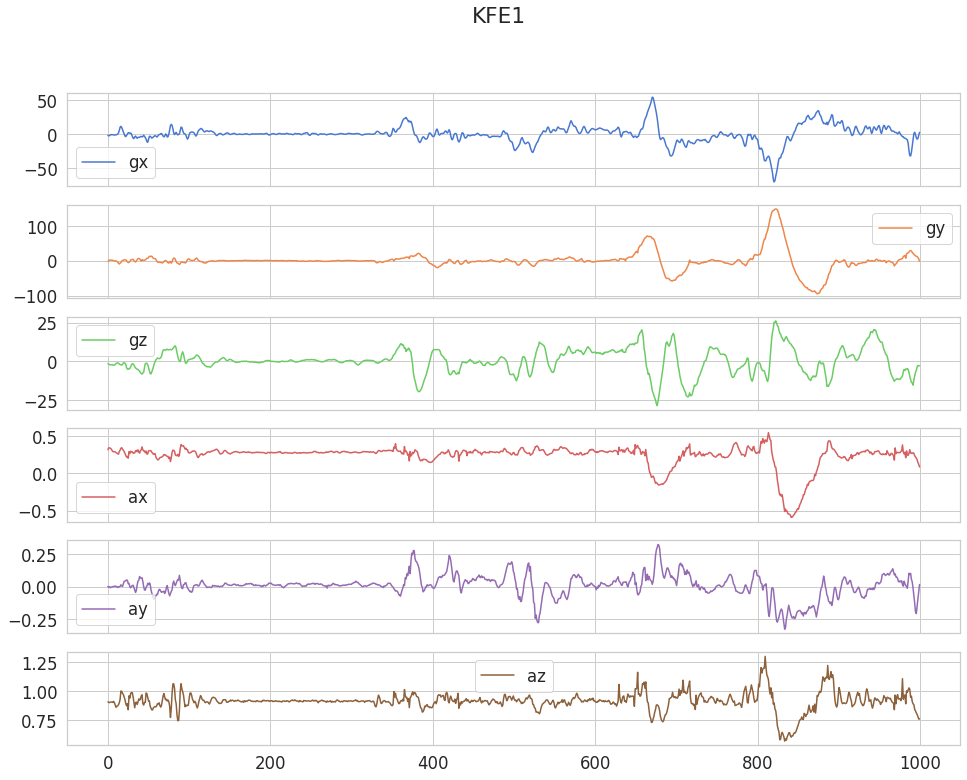

In [27]:
plot_activity("KFE1", df)

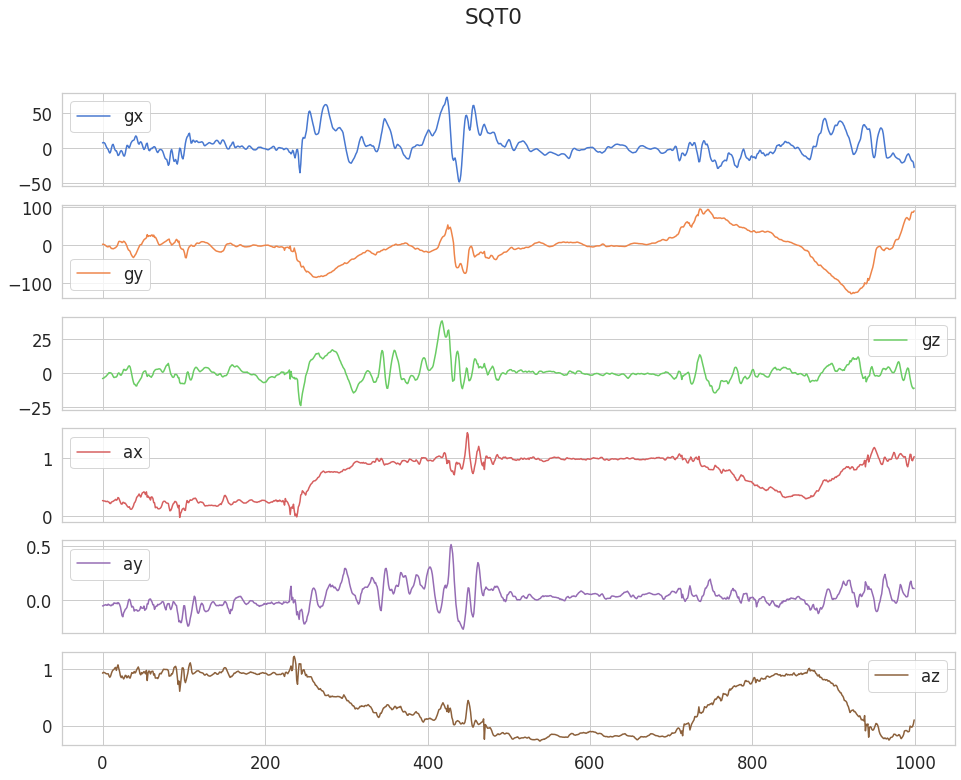

In [28]:
plot_activity("SQT0", df)

# Preprocessing


In [29]:
N_TIME_STEPS = 500 # 5 seconds at 100 Hz
N_FEATURE = 6 # 6 features
step = 20 # Hop size or overlap
segments = []
labels = []
for i in range(0, len(df)- N_TIME_STEPS, step):
  axs= df['ax'].values[i: i + N_TIME_STEPS]
  ays= df['ay'].values[i: i + N_TIME_STEPS]
  azs= df['az'].values[i: i + N_TIME_STEPS]
  gxs= df['gx'].values[i: i + N_TIME_STEPS]
  gys= df['gy'].values[i: i + N_TIME_STEPS]
  gzs= df['gz'].values[i: i + N_TIME_STEPS]
  label=stats.mode(df['exercise'][i: i + N_TIME_STEPS])
  label=label[0][0]
  segments.append([axs, ays, azs, gxs, gys, gzs])
  labels.append(label)




In [30]:
np.array(segments).shape

(48682, 6, 500)

In [31]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURE)
reshaped_segments.shape


(48682, 500, 6)

In [32]:
labels= np.asarray(pd.get_dummies(labels), dtype= np.float32)

In [ ]:
print(labels)
print(labels.shape)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
(48682, 6)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.2, random_state= 0, stratify = labels )

In [34]:
len(y_train)

38945

In [35]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [36]:
y_train.shape

(38945, 6)

In [37]:
y_test.shape

(9737, 6)

In [38]:
X_train.shape



(38945, 500, 6)

In [39]:
X_test.shape

(9737, 500, 6)

In [40]:
X_train[0].shape

(500, 6)

In [41]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [42]:
X_train[0].shape

(500, 6, 1)

In [43]:
X_train.shape

(38945, 500, 6, 1)

In [44]:
X_test.shape

(9737, 500, 6, 1)


#cnn lstm


In [45]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from matplotlib import pyplot



model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=X_train[0].shape))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs= 10, verbose=1)

_, accuracy = model.evaluate(X_test, y_test, verbose=1)

print(accuracy)

Epoch 1/10
1218/1218 [==============================] - 734s 600ms/step - loss: 1.0751 - accuracy: 0.5573
Epoch 2/10
1218/1218 [==============================] - 721s 592ms/step - loss: 0.7319 - accuracy: 0.7190
Epoch 3/10
1218/1218 [==============================] - 727s 597ms/step - loss: 0.5402 - accuracy: 0.7882
Epoch 4/10
1218/1218 [==============================] - 728s 598ms/step - loss: 0.4172 - accuracy: 0.8310
Epoch 5/10
1218/1218 [==============================] - 733s 602ms/step - loss: 0.3521 - accuracy: 0.8513
Epoch 6/10
1218/1218 [==============================] - 736s 605ms/step - loss: 0.3133 - accuracy: 0.8646
Epoch 7/10
1218/1218 [==============================] - 739s 607ms/step - loss: 0.3254 - accuracy: 0.8658
Epoch 8/10
1218/1218 [==============================] - 737s 605ms/step - loss: 0.2661 - accuracy: 0.8836
Epoch 9/10
1218/1218 [==============================] - 737s 605ms/step - loss: 0.2431 - accuracy: 0.8929
Epoch 10/10
305/305 [=========================

# Tensorflow to Tensorflow lite

In [46]:
model.save('model.h5')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 500, 4, 64)       256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 500, 2, 64)       12352     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 500, 2, 64)       0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 500, 1, 64)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 500, 64)          0

In [48]:
tflite_model = tf.keras.models.load_model('model.h5')

In [49]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

convert_bytes(get_file_size('model.h5'), "MB")

File size: 1.078 Megabytes


In [52]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('motionmodel.tflite', 'wb').write(tfmodel)
     

109840

In [53]:
convert_bytes(get_file_size("motionmodel.tflite"), "KB")

File size: 107.266 Kilobytes
